# Project 4 : Regression Analysis

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.feature_selection import f_regression, mutual_info_regression
import random

random.seed(42)

## Dataset 2: Boston Housing Dataset

### problem 1

In [68]:
housing_df = pd.read_csv("housing_data.csv", names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
housing_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

### problem 2(a)

In [69]:
housing_df_train_X = housing_df.drop(['MEDV'], axis=1)
housing_df_train_X.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33

In [70]:
housing_df_train_Y = housing_df[['MEDV']]
housing_df_train_Y.head()

MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2

In [71]:
housing_df_train_X = np.array(housing_df_train_X)
housing_df_train_Y = np.array(housing_df_train_Y)
mod = sm.OLS(housing_df_train_Y, housing_df_train_X)    # Describe model
res = mod.fit()       # Fit model
print(res.summary()) 

#Variable with high P value is not significant

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Thu, 07 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:51:06   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0929      0.034     -2.699      0.0

### problem 2(b): Linear Regression using 10-fold Cross Validation

In [72]:
def TenFoldCV(model, train_X, train_Y):
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    kf.get_n_splits(train_X)
    
    training_rmse = list()
    testing_rmse = list()
    for train_index, test_index in kf.split(train_X):
        model.fit(train_X[train_index],train_Y[train_index])
        #training rmse
        predicted_Y = model.predict(train_X[train_index])
        training_rmse.append(np.sqrt(mean_squared_error(predicted_Y, train_Y[train_index])))
        #testing rmse
        predicted_Y = model.predict(train_X[test_index])
        testing_rmse.append(np.sqrt(mean_squared_error(predicted_Y, train_Y[test_index])))
    print("Average training RMSE: ", np.average(training_rmse))
    print("Average testing RMSE: ", np.average(testing_rmse))
    return training_rmse, testing_rmse

In [73]:
def drawScatterPlots(train_Y, predicted_Y):
    #Fitted values against true values
    fig, ax = plt.subplots()
    ax.scatter(x=train_Y, y= predicted_Y)
    ax.plot([train_Y.min(), train_Y.max()], [train_Y.min(), train_Y.max()],  'k--', lw=3)
    ax.set_xlabel('True values')
    ax.set_ylabel('Fitted values')
    plt.show()

    #Residual against fitted values
    residual_Y = train_Y - predicted_Y
    fig, ax = plt.subplots()
    ax.scatter(predicted_Y, residual_Y)
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residual')
    plt.show()

Average training RMSE:  4.670454144364911
Average testing RMSE:  4.7929925360045855
[[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
  -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
   3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
  -5.24758378e-01]]


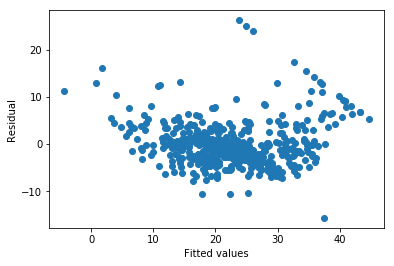

In [100]:
reg = LinearRegression(normalize=True)
TenFoldCV(reg,housing_df_train_X, housing_df_train_Y )

reg.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = reg.predict(housing_df_train_X)
print(reg.coef_)

drawScatterPlots(housing_df_train_Y,housing_df_predicted_Y )

### problem 3: Ridge Regression and Lasso Regression

In [75]:
# Ridge regression
Alpha = [1,0.1,0.01,0.001]

rmse_for_Alpha = list()
for alpha in Alpha:
    ridge = Ridge(normalize=True, alpha = alpha)
    print("alpha: " + str(alpha))
    _ , testing_rmse = TenFoldCV(ridge, housing_df_train_X, housing_df_train_Y)
    rmse_for_Alpha.append(np.average(testing_rmse))

print ("----------")

best_alpha = Alpha[np.argmin(rmse_for_Alpha)]
ridge = RidgeCV(normalize=True,alphas= [best_alpha], cv=10)
ridge.fit(housing_df_train_X, housing_df_train_Y)
housing_df_predicted_Y = ridge.predict(housing_df_train_X)
print(ridge.coef_)

print ("Best Alpha value for Ridge Regression : " + str(best_alpha))
print ('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y)))


alpha: 1
Average training RMSE:  5.545176844466782
Average testing RMSE:  5.579532934486909
alpha: 0.1
Average training RMSE:  4.751909135062023
Average testing RMSE:  4.842625212247374
alpha: 0.01
Average training RMSE:  4.672847000708183
Average testing RMSE:  4.790628723005426
alpha: 0.001
Average training RMSE:  4.670483185518561
Average testing RMSE:  4.792508850868982
----------
[[-1.03542237e-01  4.34058197e-02  5.19960647e-03  2.74630656e+00
  -1.66255959e+01  3.86518807e+00 -3.41085552e-04 -1.41355030e+00
   2.69158524e-01 -1.05767047e-02 -9.34595971e-01  9.28758725e-03
  -5.15910557e-01]]
Best Alpha value for Ridge Regression : 0.01
Best RMSE for corresponding Alpha = 4.681570246920186


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
# Lasso Regression

Alpha = [1,0.1,0.01,0.001,0.0005, 0.0001]

rmse_for_Alpha = list()
for alpha in Alpha:
    lasso = Lasso(normalize=True, alpha = alpha)
    print("alpha: " + str(alpha))
    _ , testing_rmse = TenFoldCV(lasso, housing_df_train_X, housing_df_train_Y)
    rmse_for_Alpha.append(np.average(testing_rmse))

print ("----------")

best_alpha = Alpha[np.argmin(rmse_for_Alpha)]
lasso = LassoCV(normalize=True, alphas = [best_alpha], cv=10)
lasso.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = lasso.predict(housing_df_train_X)
print(lasso.coef_)

print ("Best Alpha value for Lasso Regularization : " + str(best_alpha))
print ('Best RMSE for corresponding Alpha =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y)))

alpha: 1
Average training RMSE:  9.187066923162694
Average testing RMSE:  9.175068056880152
alpha: 0.1
Average training RMSE:  5.8631153265534115
Average testing RMSE:  5.8899258054840615
alpha: 0.01
Average training RMSE:  4.8473396474252475
Average testing RMSE:  4.955764682248477
alpha: 0.001
Average training RMSE:  4.673439627316392
Average testing RMSE:  4.787186640815802
alpha: 0.0005
Average training RMSE:  4.671258450235468
Average testing RMSE:  4.789598782525104
alpha: 0.0001
Average training RMSE:  4.6704879302046765
Average testing RMSE:  4.792236760244802
----------
[-1.00549239e-01  4.23750555e-02  0.00000000e+00  2.69026297e+00
 -1.65258561e+01  3.85232711e+00 -0.00000000e+00 -1.41597570e+00
  2.63004585e-01 -1.02547310e-02 -9.33489599e-01  9.08023522e-03
 -5.22501984e-01]
Best Alpha value for Lasso Regularization : 0.001
Best RMSE for corresponding Alpha = 4.682152165446494


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [77]:
# Elastic Net

Alpha = [1,0.1,0.01,0.001]
L1_ratio = [0,0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

rmse_list = list()
for alpha in Alpha:
    for ratio in L1_ratio:
        net = ElasticNet(random_state=42, alpha=alpha, l1_ratio = ratio, max_iter=1000)
        print("alpha: " + str(alpha) + ", L1_ratio: " + str(ratio))
        _ , testing_rmse = TenFoldCV(net, housing_df_train_X, housing_df_train_Y)
        rmse_list.append(np.average(testing_rmse))

print ("----------")

best_alpha = Alpha[np.argmin(rmse_list)//len(L1_ratio)]
best_l1_ratio = L1_ratio[np.argmin(rmse_list)%len(L1_ratio)]
net = ElasticNetCV(normalize=True, alphas = [best_alpha], l1_ratio = [best_l1_ratio], cv=10,  max_iter=1000)
net.fit(housing_df_train_X,housing_df_train_Y)
housing_df_predicted_Y = net.predict(housing_df_train_X)
print(net.coef_)

print ("Best Alpha value for Lasso Regularization : " + str(best_alpha))
print ("Best L1 ratio value for Lasso Regularization : " + str(best_l1_ratio))
print ('Best RMSE for corresponding Alpha and L1_ratio =', np.sqrt(mean_squared_error(housing_df_train_Y, housing_df_predicted_Y)))

alpha: 1, L1_ratio: 0


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Average training RMSE:  5.116749315249062
Average testing RMSE:  5.223342978336722
alpha: 1, L1_ratio: 0.1
Average training RMSE:  5.1225534214775035
Average testing RMSE:  5.2302340633029925
alpha: 1, L1_ratio: 0.2
Average training RMSE:  5.128575442260425
Average testing RMSE:  5.236918138114297
alpha: 1, L1_ratio: 0.3
Average training RMSE:  5.132318024779549
Average testing RMSE:  5.241162315532595
alpha: 1, L1_ratio: 0.4
Average training RMSE:  5.136341450514844
Average testing RMSE:  5.245727211600449
alpha: 1, L1_ratio: 0.5
Average training RMSE:  5.140821888032432
Average testing RMSE:  5.2507226284140724
alpha: 1, L1_ratio: 0.6
Average training RMSE:  5.145774999038599
Average testing RMSE:  5.256421912306559
alpha: 1, L1_ratio: 0.7
Average training RMSE:  5.151144883380441
Average testing RMSE:  5.262834983450032
alpha: 1, L1_ratio: 0.8
Average training RMSE:  5.157024630992626
Average testing RMSE:  5.270591362996316
alpha: 1, L1_ratio: 0.9
Average training RMSE:  5.16338826

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Average training RMSE:  4.803563205380606
Average testing RMSE:  4.923731828768249
alpha: 0.1, L1_ratio: 0.6
Average training RMSE:  4.801258362837208
Average testing RMSE:  4.922411617413
alpha: 0.1, L1_ratio: 0.7
Average training RMSE:  4.798422707468914
Average testing RMSE:  4.92096300484133
alpha: 0.1, L1_ratio: 0.8
Average training RMSE:  4.795824856433062
Average testing RMSE:  4.92005231586951
alpha: 0.1, L1_ratio: 0.9
Average training RMSE:  4.7935695242086656
Average testing RMSE:  4.9201112306629
alpha: 0.1, L1_ratio: 1
Average training RMSE:  4.7917697372284405
Average testing RMSE:  4.921197491664635
alpha: 0.01, L1_ratio: 0
Average training RMSE:  4.731737276528432
Average testing RMSE:  4.85474856650007
alpha: 0.01, L1_ratio: 0.1


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Average training RMSE:  4.729333708095867
Average testing RMSE:  4.852491860783843
alpha: 0.01, L1_ratio: 0.2
Average training RMSE:  4.726586004684139
Average testing RMSE:  4.849880978204611
alpha: 0.01, L1_ratio: 0.3
Average training RMSE:  4.723407298417471
Average testing RMSE:  4.846825020376583
alpha: 0.01, L1_ratio: 0.4
Average training RMSE:  4.7196810110338925
Average testing RMSE:  4.843202502343379
alpha: 0.01, L1_ratio: 0.5
Average training RMSE:  4.715249190965398
Average testing RMSE:  4.838829442955282
alpha: 0.01, L1_ratio: 0.6
Average training RMSE:  4.709902642623378
Average testing RMSE:  4.833395780358748
alpha: 0.01, L1_ratio: 0.7
Average training RMSE:  4.703332762896631
Average testing RMSE:  4.826799090925394
alpha: 0.01, L1_ratio: 0.8
Average training RMSE:  4.695189235542577
Average testing RMSE:  4.818526506441823
alpha: 0.01, L1_ratio: 0.9
Average training RMSE:  4.685206657149685
Average testing RMSE:  4.808341419363857
alpha: 0.01, L1_ratio: 1
Average tra

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Average training RMSE:  4.676754600637215
Average testing RMSE:  4.799120287950053
alpha: 0.001, L1_ratio: 0.1
Average training RMSE:  4.675889939343015
Average testing RMSE:  4.7982472950762505
alpha: 0.001, L1_ratio: 0.2
Average training RMSE:  4.675049085857777
Average testing RMSE:  4.79740117133034
alpha: 0.001, L1_ratio: 0.3
Average training RMSE:  4.674239742317239
Average testing RMSE:  4.796591862502343
alpha: 0.001, L1_ratio: 0.4
Average training RMSE:  4.673470683580314
Average testing RMSE:  4.795827535807279
alpha: 0.001, L1_ratio: 0.5
Average training RMSE:  4.672753102886434
Average testing RMSE:  4.795122279250573
alpha: 0.001, L1_ratio: 0.6
Average training RMSE:  4.672099613047386
Average testing RMSE:  4.79448791985361
alpha: 0.001, L1_ratio: 0.7
Average training RMSE:  4.67152602919454
Average testing RMSE:  4.793942878627992
alpha: 0.001, L1_ratio: 0.8
Average training RMSE:  4.671051347267063
Average testing RMSE:  4.793513004501272
alpha: 0.001, L1_ratio: 0.9
Ave

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Dataset 3

In [78]:
insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])
insurance_df_categroical.head()

ft4  ft5        ft6
0  female  yes  southwest
1    male   no  southeast
2    male   no  southeast
3    male   no  northwest
4    male   no  northwest

### problem 1(a): One Hot Encoding

In [79]:
enc = OneHotEncoder()
enc.fit(insurance_df_categroical)
one_hot_labels = enc.transform(insurance_df_categroical).toarray()

In [80]:
insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)
df1 = pd.DataFrame(data = insurance_df_train_X, columns=['ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8', 'ft9', 'ft10', 'ft11'])
df1.head()

ft1     ft2  ft3  ft4  ft5  ft6  ft7  ft8  ft9  ft10  ft11
0  19.0  27.900  0.0  1.0  0.0  0.0  1.0  0.0  0.0   0.0   1.0
1  18.0  33.770  1.0  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
2  28.0  33.000  3.0  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
3  33.0  22.705  0.0  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0
4  32.0  28.880  0.0  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0

Average training RMSE:  6040.352471670377
Average testing RMSE:  6066.1961592429025


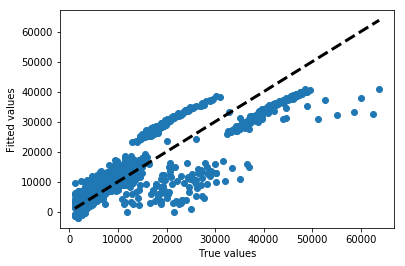

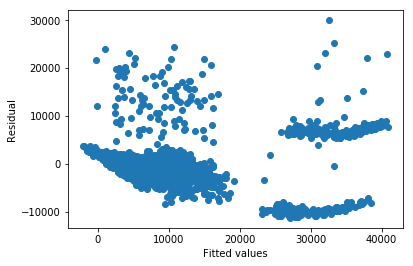

In [81]:
reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

### problem 1(b):  Standardize + One Hot Encoding

In [82]:
scaler = StandardScaler()
standard_numerical = scaler.fit_transform(insurance_df_numerical)

insurance_df_train_X = np.concatenate((standard_numerical, one_hot_labels), axis=1)
df2 = pd.DataFrame(data = insurance_df_train_X, columns=['ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8', 'ft9', 'ft10', 'ft11'])
df2.head()

ft1       ft2       ft3  ft4  ft5  ft6  ft7  ft8  ft9  ft10  ft11
0 -1.438764 -0.453320 -0.908614  1.0  0.0  0.0  1.0  0.0  0.0   0.0   1.0
1 -1.509965  0.509621 -0.078767  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
2 -0.797954  0.383307  1.580926  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
3 -0.441948 -1.305531 -0.908614  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0
4 -0.513149 -0.292556 -0.908614  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0

Average training RMSE:  6040.884853215843
Average testing RMSE:  6072.56145214846


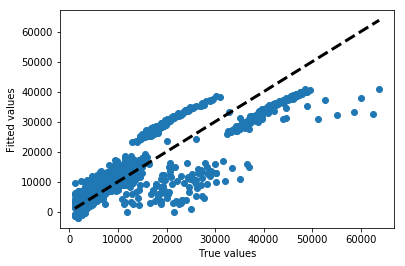

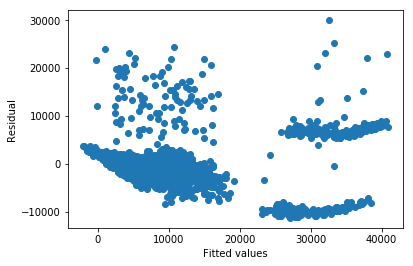

In [83]:
reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

### problem 1(c): Divide ft1 into 3 ranges + Standardize ft2 ft3 + One Hot Encoding

In [84]:
insurance_df_ft1 = np.array(insurance_df['ft1'])
insurance_df_ft2_ft3 = np.array(insurance_df[['ft2', 'ft3']])
new_ft1 = list()

for val in insurance_df_ft1:
    if val < 30:
        new_ft1.append([1])
    elif val > 50:
        new_ft1.append([3])
    else:
        new_ft1.append([2])
        
standard_ft2_ft3 = scaler.fit_transform(insurance_df_ft2_ft3)
        
insurance_df_train_X = np.concatenate((new_ft1,standard_ft2_ft3, one_hot_labels), axis=1)
df3 = pd.DataFrame(data = insurance_df_train_X, columns=['ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6', 'ft7', 'ft8', 'ft9', 'ft10', 'ft11'])
df3.head()


ft1       ft2       ft3  ft4  ft5  ft6  ft7  ft8  ft9  ft10  ft11
0  1.0 -0.453320 -0.908614  1.0  0.0  0.0  1.0  0.0  0.0   0.0   1.0
1  1.0  0.509621 -0.078767  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
2  1.0  0.383307  1.580926  0.0  1.0  1.0  0.0  0.0  0.0   1.0   0.0
3  2.0 -1.305531 -0.908614  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0
4  2.0 -0.292556 -0.908614  0.0  1.0  1.0  0.0  0.0  1.0   0.0   0.0

Average training RMSE:  6199.837835214862
Average testing RMSE:  6226.071276987422


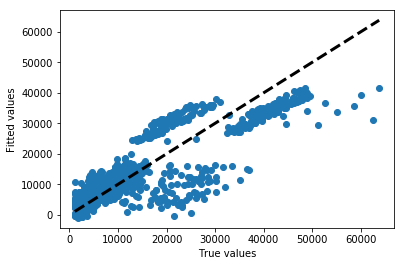

In [85]:

reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

### problem 2: Correlation Exploration

In [86]:
#change all variables into numerical value
le = LabelEncoder()

ft4 = np.array(insurance_df_categroical['ft4'])
ft5 = np.array(insurance_df_categroical['ft5'])
ft6 = np.array(insurance_df_categroical['ft6'])
new_ft4 = le.fit_transform(ft4)
new_ft5 = le.fit_transform(ft5)
new_ft6 = le.fit_transform(ft6)

length = len(ft4)

new_ft4 = np.reshape(new_ft4, (length,1))
new_ft5 = np.reshape(new_ft5, (length,1))
new_ft6 = np.reshape(new_ft6, (length,1))

numeric_insurance_df_train_X = np.concatenate((insurance_df_numerical,new_ft4, new_ft5, new_ft6), axis=1)
df4 = pd.DataFrame(data = numeric_insurance_df_train_X, columns=['ft1', 'ft2', 'ft3', 'ft4', 'ft5', 'ft6'])
df4.head()

ft1     ft2  ft3  ft4  ft5  ft6
0  19.0  27.900  0.0  0.0  1.0  3.0
1  18.0  33.770  1.0  1.0  0.0  2.0
2  28.0  33.000  3.0  1.0  0.0  2.0
3  33.0  22.705  0.0  1.0  0.0  1.0
4  32.0  28.880  0.0  1.0  0.0  1.0

In [87]:
# Perform F regression and mutual information regression
f_values, p_values = f_regression(numeric_insurance_df_train_X, insurance_df_train_Y)
print (f_values) #high f value, low p value means significant
print (p_values)
mutual_info = mutual_info_regression(numeric_insurance_df_train_X, insurance_df_train_Y)
print (mutual_info) #high mutual info value means significant

[1.31174013e+02 5.47093081e+01 6.20603705e+00 4.39970170e+00
 2.17761487e+03 5.14943381e-02]
[4.88669333e-029 2.45908554e-013 1.28521285e-002 3.61327210e-002
 8.27143584e-283 8.20517836e-001]
[1.49792961 0.07295597 0.16160789 0.17665987 0.36917105 0.07649234]


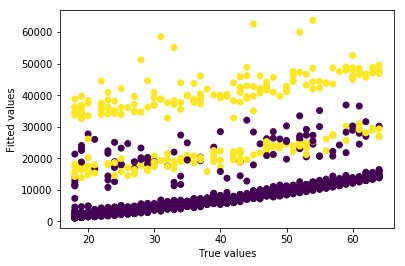

In [88]:
def coloredScatterPlot(X, Y, color):
    fig, ax = plt.subplots()
    ax.scatter(x=X, y= Y, c = color)
    ax.set_xlabel('True values')
    ax.set_ylabel('Fitted values')
    plt.show()
    
#draw colored scatter plot
coloredScatterPlot(numeric_insurance_df_train_X[:,1], insurance_df_train_Y,numeric_insurance_df_train_X[:,4] )
coloredScatterPlot(numeric_insurance_df_train_X[:,0], insurance_df_train_Y,numeric_insurance_df_train_X[:,4] )


### problem 3: Fitting log(y) for target variable

Average training RMSE:  8376.83969997326
Average testing RMSE:  8399.363589718047


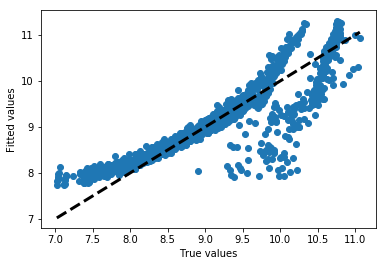

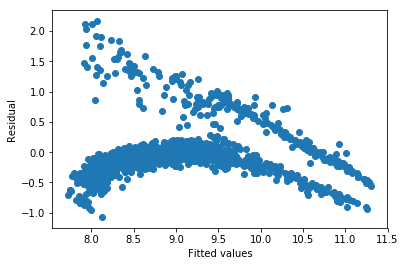

In [89]:
insurance_df_train_Y_log = np.log(insurance_df_train_Y)

#using one hot encoding for feature 4 - feature 6, using original number for feature 1 - feature 3
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)

reg = LinearRegression(normalize=True)

kf = KFold(n_splits=10, shuffle=True, random_state=42)
kf.get_n_splits(insurance_df_train_X)

# 10 fold cross validation
training_rmse = list()
testing_rmse = list()
for train_index, test_index in kf.split(insurance_df_train_X):
    reg.fit(insurance_df_train_X[train_index],insurance_df_train_Y_log[train_index])
    #training rmse
    predicted_Y = reg.predict(insurance_df_train_X[train_index])
    training_rmse.append(np.sqrt(mean_squared_error(np.exp(predicted_Y), np.exp(insurance_df_train_Y_log[train_index]))))
    #testing rmse
    predicted_Y = reg.predict(insurance_df_train_X[test_index])
    testing_rmse.append(np.sqrt(mean_squared_error(np.exp(predicted_Y), np.exp(insurance_df_train_Y_log[test_index]))))
print("Average training RMSE: ", np.average(training_rmse))
print("Average testing RMSE: ", np.average(testing_rmse))

reg.fit(insurance_df_train_X,insurance_df_train_Y_log)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y_log,insurance_df_predicted_Y )

In [90]:
#Repeat Correlation Exploration part for log(y)
f_values, p_values = f_regression(numeric_insurance_df_train_X, insurance_df_train_Y_log)
print (f_values) #high f value, low p value means significant
print (p_values)
mutual_info = mutual_info_regression(numeric_insurance_df_train_X, insurance_df_train_Y_log)
print (mutual_info) #high mutual info value means significant

[5.15977081e+02 2.39364692e+01 3.57046705e+01 4.23764137e-02
 1.06212392e+03 2.43916473e+00]
[7.47738522e-097 1.11667665e-006 2.94069066e-009 8.36935289e-001
 6.30764636e-172 1.18576054e-001]
[1.5039794  0.06859363 0.16101784 0.17628529 0.36939335 0.07753486]


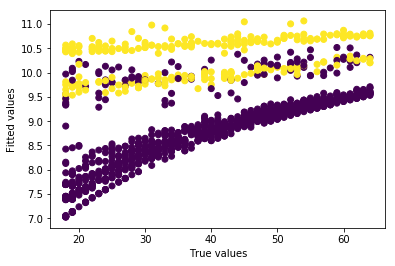

In [91]:
coloredScatterPlot(numeric_insurance_df_train_X[:,1], insurance_df_train_Y_log,numeric_insurance_df_train_X[:,4] )
coloredScatterPlot(numeric_insurance_df_train_X[:,0], insurance_df_train_Y_log,numeric_insurance_df_train_X[:,4] )

### problem 4(a): further feature encoding

In [92]:
#change all variables into numerical value
le = LabelEncoder()

ft4 = np.array(insurance_df_categroical['ft4'])
ft5 = np.array(insurance_df_categroical['ft5'])
ft6 = np.array(insurance_df_categroical['ft6'])
new_ft4 = le.fit_transform(ft4)
new_ft5 = le.fit_transform(ft5)
new_ft6 = le.fit_transform(ft6)

length = len(ft4)

new_ft4 = np.reshape(new_ft4, (length,1))
new_ft5 = np.reshape(new_ft5, (length,1))
new_ft6 = np.reshape(new_ft6, (length,1))

numeric_insurance_df_train_X = np.concatenate((insurance_df_numerical,new_ft4, new_ft5, new_ft6), axis=1)
poly = PolynomialFeatures(2)
numeric_insurance_df_train_X = poly.fit_transform(numeric_insurance_df_train_X)
df4 = pd.DataFrame(data = numeric_insurance_df_train_X)
df4.head()

0     1       2    3    4    5    6       7        8     9  ...    18  \
0  1.0  19.0  27.900  0.0  0.0  1.0  3.0   361.0  530.100   0.0 ...   0.0   
1  1.0  18.0  33.770  1.0  1.0  0.0  2.0   324.0  607.860  18.0 ...   1.0   
2  1.0  28.0  33.000  3.0  1.0  0.0  2.0   784.0  924.000  84.0 ...   9.0   
3  1.0  33.0  22.705  0.0  1.0  0.0  1.0  1089.0  749.265   0.0 ...   0.0   
4  1.0  32.0  28.880  0.0  1.0  0.0  1.0  1024.0  924.160   0.0 ...   0.0   

    19   20   21   22   23   24   25   26   27  
0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  3.0  9.0  
1  1.0  0.0  2.0  1.0  0.0  2.0  0.0  0.0  4.0  
2  3.0  0.0  6.0  1.0  0.0  2.0  0.0  0.0  4.0  
3  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  
4  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  

[5 rows x 28 columns]

Average training RMSE:  4737.268113280409
Average testing RMSE:  4799.386560914034


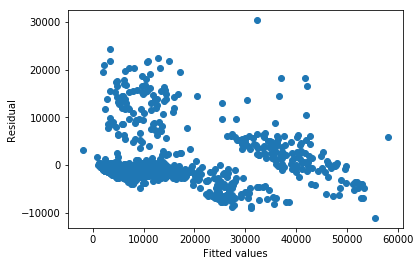

In [93]:

reg = LinearRegression(normalize=True)

TenFoldCV(reg,numeric_insurance_df_train_X, insurance_df_train_Y )

reg.fit(numeric_insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(numeric_insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

Average training RMSE:  4846.436497788038
Average testing RMSE:  4904.848703919273


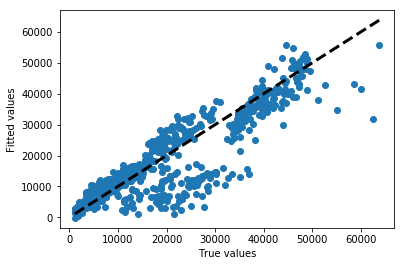

In [94]:
# Polynomial Features on all features with one-hot

insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])

enc = OneHotEncoder()
enc.fit(insurance_df_categroical)
one_hot_labels = enc.transform(insurance_df_categroical).toarray()

insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)

poly = PolynomialFeatures(2)
insurance_df_train_X = poly.fit_transform(insurance_df_train_X)

reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )


Average training RMSE:  6047.512267324628
Average testing RMSE:  6136.0341138193235


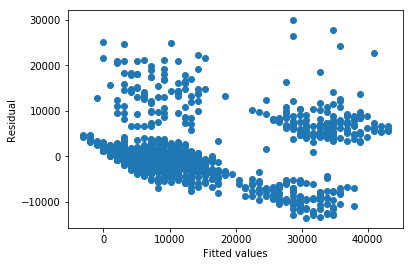

In [95]:
# Polynomial Features on only one-hot features

insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])

enc = OneHotEncoder()
enc.fit(insurance_df_categroical)
one_hot_labels = enc.transform(insurance_df_categroical).toarray()
poly = PolynomialFeatures(2)
one_hot_labels = poly.fit_transform(one_hot_labels)


insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)

reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )


Average training RMSE:  5980.3783493105175
Average testing RMSE:  6043.137885984174


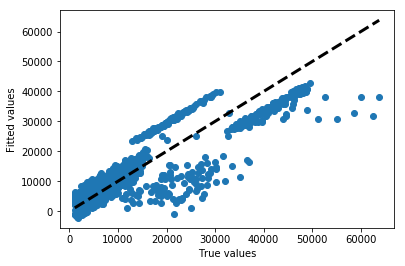

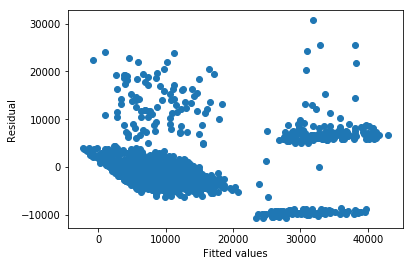

In [96]:
# Polynomial Features on only numerical features

insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])

enc = OneHotEncoder()
enc.fit(insurance_df_categroical)
one_hot_labels = enc.transform(insurance_df_categroical).toarray()

insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
poly = PolynomialFeatures(2)
insurance_df_numerical = poly.fit_transform(insurance_df_numerical)
insurance_df_train_X = np.concatenate((insurance_df_numerical, one_hot_labels), axis=1)

reg = LinearRegression(normalize=True)

TenFoldCV(reg,insurance_df_train_X, insurance_df_train_Y )

reg.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = reg.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

### problem 4(b): further feature encoding

Average training RMSE:  4051.3822315291645
Average testing RMSE:  4493.500041118015


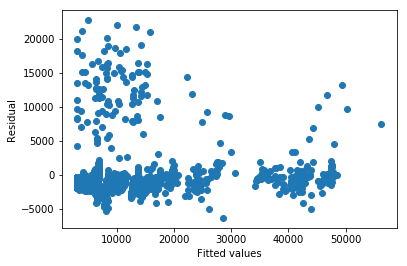

In [97]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

# Polynomial Features on all features 

insurance_df = pd.read_csv("insurance_data.csv")
insurance_df_categroical = insurance_df.select_dtypes(include=[object])

le = LabelEncoder()

ft4 = np.array(insurance_df_categroical['ft4'])
ft5 = np.array(insurance_df_categroical['ft5'])
ft6 = np.array(insurance_df_categroical['ft6'])
new_ft4 = le.fit_transform(ft4)
new_ft5 = le.fit_transform(ft5)
new_ft6 = le.fit_transform(ft6)

length = len(ft4)

new_ft4 = np.reshape(new_ft4, (length,1))
new_ft5 = np.reshape(new_ft5, (length,1))
new_ft6 = np.reshape(new_ft6, (length,1))

insurance_df_train_Y = np.array(insurance_df['charges'])
insurance_df_numerical = np.array(insurance_df[['ft1', 'ft2', 'ft3']])
insurance_df_train_X = np.concatenate((insurance_df_numerical, new_ft4, new_ft5, new_ft6), axis=1)

poly = PolynomialFeatures(2)
insurance_df_train_X = poly.fit_transform(insurance_df_train_X)

rf = RandomForestRegressor(random_state=42, n_estimators = 200, max_depth = 5, bootstrap = True, oob_score = True)

TenFoldCV(rf,insurance_df_train_X, insurance_df_train_Y )

rf.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = rf.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

Average training RMSE:  5152.737957716946
Average testing RMSE:  5198.432717488813


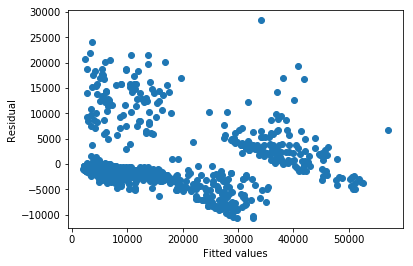

In [98]:
#Neural Network
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, hidden_layer_sizes=(200,200, ), max_iter = 1500)

TenFoldCV(mlp,insurance_df_train_X, insurance_df_train_Y )

mlp.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = mlp.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )

Average training RMSE:  3890.481261454542
Average testing RMSE:  4489.036661482436


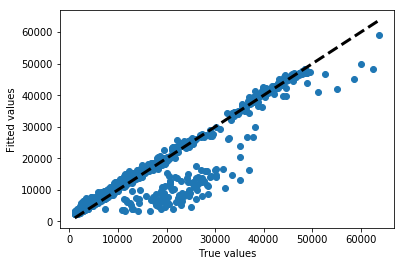

In [99]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42, n_estimators=50,learning_rate = 0.1)

TenFoldCV(gbr,insurance_df_train_X, insurance_df_train_Y )

gbr.fit(insurance_df_train_X,insurance_df_train_Y)
insurance_df_predicted_Y = gbr.predict(insurance_df_train_X)

drawScatterPlots(insurance_df_train_Y,insurance_df_predicted_Y )